# Numerical Linear Algebra (FMNN01)
__LTH Fall 2019__
## Assignment 5
__Jonas Lundgren__

In [3]:
from scipy import *
from scipy.linalg import *
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
%matplotlib inline

# Task 1

In [4]:
A = array([[5   , 0, 0, -1],
           [1   , 0, -1, 1],
           [-1.5, 1, -2, 1],
           [-1  , 1, 3, -3]])
A

array([[ 5. ,  0. ,  0. , -1. ],
       [ 1. ,  0. , -1. ,  1. ],
       [-1.5,  1. , -2. ,  1. ],
       [-1. ,  1. ,  3. , -3. ]])

In [5]:
def Ap_eig(A, p):
    
    P = p*(A - eye(A.shape[0])*diag(A))
    Ap = A - P
    
    eigen_vals, _ = eig(Ap)
    
    return eigen_vals, Ap

In [6]:
def plot_Gerschgorin(A, p):
    eigen_vals, Ap = Ap_eig(A, p)
    
    n_rows = A.shape[0]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(10., 10.)
    ax.set(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_xlabel("Re")
    ax.set_ylabel("Im")
    ax.set_title("Eigenvalues of A(p)")
    
    for row in range(n_rows):
        diag_element = diag(Ap)[row]
        radius = sum(abs(Ap[row,:])) - abs(diag_element)
        circle = plt.Circle((diag_element, 0), radius, color='grey', alpha=0.1)
        ax.add_artist(circle)
        
    ax.scatter(diag(A), zeros(n_rows), c = 'grey', marker = "x")
    ax.scatter(eigen_vals.real, eigen_vals.imag, c = 'r')
    
    return fig, ax

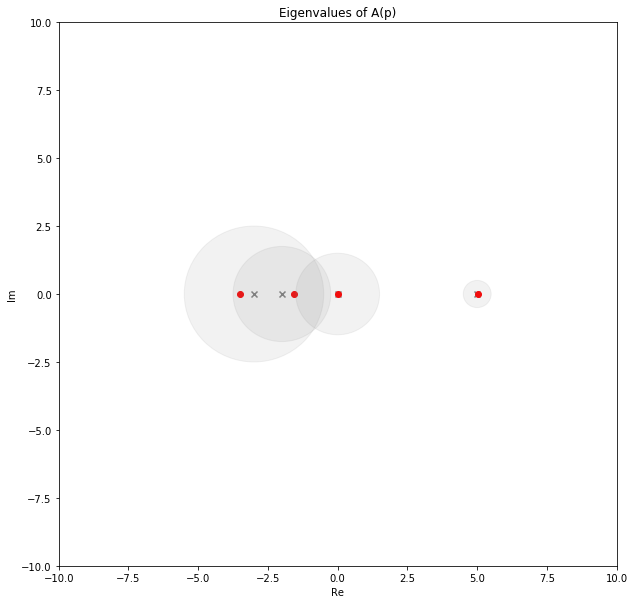

In [7]:
plot_Gerschgorin(A, p = 0.5);

Change `create_images` to `True` to generate images.

In [8]:
create_images = False

if create_images:
    p_vec = linspace(0,1,100)

    for i, p in enumerate(p_vec):
        fig, ax = plot_Gerschgorin(A,p)
        name = "figures/" + str(i+1) + ".png"
        fig.savefig(name)


If one disc is not connected to any of the other discs it contains 1 eigenvalue. For overlapping discs, the overlapping area (union) of the discs contains as many eigenvalues as the number of overlapping discs.

In [9]:
def plot_Gerschgorin_(A, nrows = 3, ncols = 3):

    
    n_rows = A.shape[0]
    
    fig, axs = plt.subplots(nrows, ncols)
    fig.set_size_inches(14., 14.)
    #fig.suptitle('Eigenvalues of A(p)')
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    
    p = linspace(0, 1, num = (nrows * ncols))
    
    for j, ax in enumerate(axs.flat):
        eigen_vals, Ap = Ap_eig(A, p[j])
        for row in range(n_rows):
            diag_element = diag(Ap)[row]
            radius = sum(abs(Ap[row,:])) - abs(diag_element)
            circle = plt.Circle((diag_element, 0), radius, color='grey', alpha=0.1)
            ax.add_artist(circle)
        
        ax.scatter(diag(A), zeros(n_rows), c = 'grey', marker = "x")
        ax.scatter(eigen_vals.real, eigen_vals.imag, c = 'r')
        ax.set(xlim=(-10, 10), ylim=(-10, 10))
        ax.set_xlabel("Re")
        ax.set_ylabel("Im")
        title = "p = " + str(p[j])
        ax.set_title(title)
    
    return axs

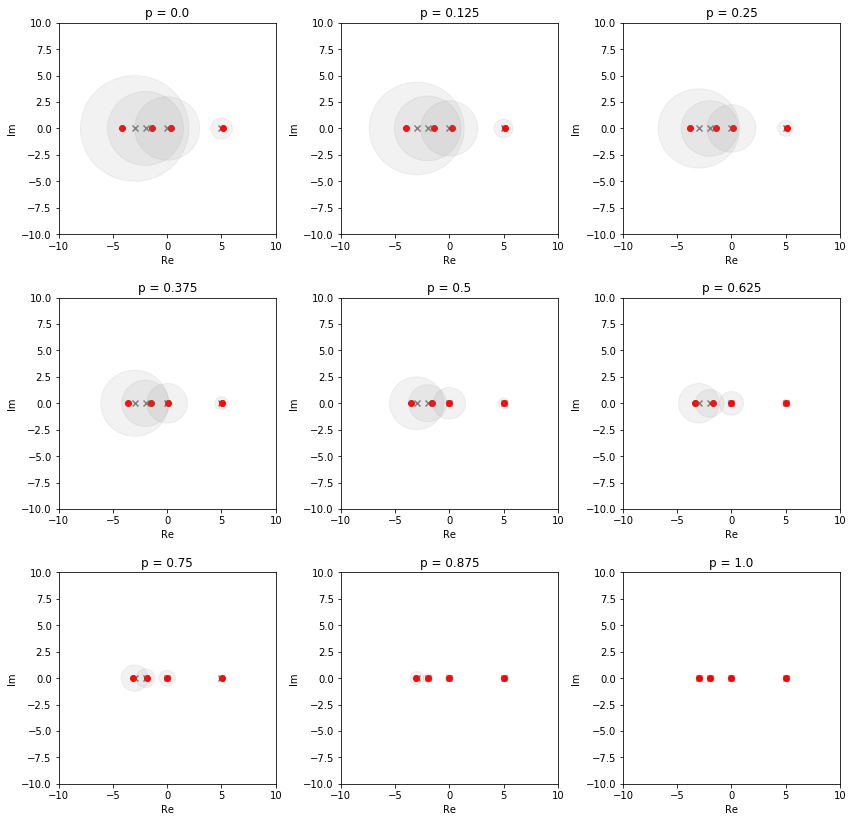

In [10]:
plot_Gerschgorin_(A);

# Task 2

In [11]:
def QR_algorithm(A):
    """
    QR Algorithm with shift and deflation
    """  
    m = len(A)
    myeigs = zeros(m)
    if m == 1:
        myeigs[0] = A[0,0]
    else:
        I = eye(m)
        A = hessenberg(A)
    
        while(norm(A[-2,-1]) > 1e-8):
            mu = A[-1,-1]
        
            Q, R = qr(A - mu*I)
            A = R @ Q + mu*I
        
        myeigs = insert(QR_algorithm(A[:(m-1),:(m-1)]), 0, A[-1,-1])
        
    return myeigs

In [14]:
def QR_algorithm_i(A, i = 0):  
    """
    To also get the matrices 
    """
    m = len(A)
    myeigs = zeros(m)
    if m == 1:
        myeigs[0] = A[0,0]
        i += 1
    else:
        I = eye(m)
        A = hessenberg(A)
    
        while(norm(A[-2,-1]) > 1e-8):
            mu = A[-1,-1]
        
            Q, R = qr(A - mu*I)
            A = R @ Q + mu*I
            i += 1
        
        myeigs, i = QR_algorithm_i(A[:(m-1),:(m-1)], i)
        
        myeigs = insert(myeigs, 0, A[-1,-1])
        
    return myeigs, i

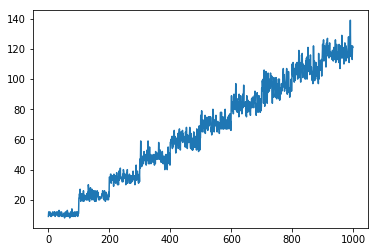

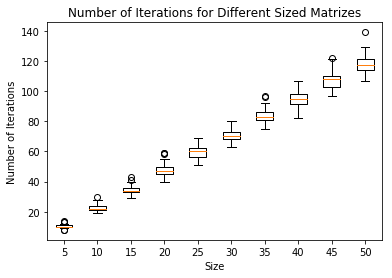

In [15]:
vals = []
sizes = [5,10,15,20,25,30,35,40,45,50]
for n in sizes:
    for _ in range(100):
        A = rand(n,n)
        A = A + A.T
        
        _, i = QR_algorithm_i(A)
        vals.append(i)
        
plt.plot(vals);
valsm = np.reshape(vals, [100,-1], 'F')
fig, ax = plt.subplots()
ax.boxplot(valsm)
ax.set_xticklabels(sizes)
ax.set_title("Number of Iterations for Different Sized Matrizes")
ax.set_xlabel("Size")
ax.set_ylabel("Number of Iterations");

In [233]:
def QR_algorithm_A(A, A_list = []):  
    """
    To also get the matrices 
    """
    m = len(A)
    myeigs = zeros(m)
    if m == 1:
        myeigs[0] = A[0,0]
        A_list.append(A)
    else:
        I = eye(m)
        A = hessenberg(A)
    
        while(norm(A[-2,-1]) > 1e-8):
            mu = A[-1,-1]
        
            Q, R = qr(A - mu*I)
            A = R @ Q + mu*I
            A_list.append(A)
        
        myeigs, A_list = QR_algorithm_plt(A[:(m-1),:(m-1)], A_list)
        
        myeigs = insert(myeigs, 0, A[-1,-1])
        
    return myeigs, A_list

In [255]:
def QR_algorithm_As(A):
    """
    Wrong
    """
    myeigs, A_list = QR_algorithm_A(A)
    m = len(A)
    A_out = []
    for i, a in enumerate(A_list):
        eig_diag = diag(myeigs)
        n = len(a)
        eig_diag[:n,:n] = a
        A_out.append(eig_diag)
    
    return A_out

KeyboardInterrupt: 

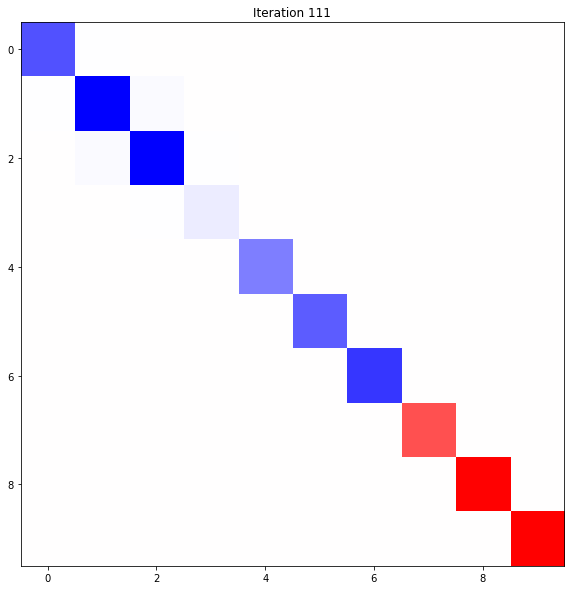

In [263]:
genreate_plots = True

dim = 10
if genreate_plots:
    A = rand(dim,dim)
    A = (A + A.T)/2
    
    fig, ax = plt.subplots()
    fig.set_size_inches(10., 10.)  
    #ax.imshow(a, cmap=colormap, norm=normalize)
    #ax.set_title("Starting Matrix")
    #name = "figures/heat.png"
    #plt.savefig(name)

    A_outs = QR_algorithm_As(A)
    colormap = plt.cm.bwr
    vmax = 1#abs(np.amax(A_outs[0]))
    normalize = matplotlib.colors.Normalize(vmin=-vmax, vmax=vmax)
    
    for i, a in enumerate(A_outs):
        ax.imshow(a, cmap=colormap, norm=normalize)
        ax.set_title("Iteration " + str(i))
        name = "figures/heat" + str(i) +".png"
        plt.savefig(name)

# Task 4

In [16]:
def bisection_method(p, a, b, tol = 1e-14):
    """
    Returns a root to function p if there is one in the interval [a,b]
    """
    if p(a)*p(b) > 0: # [a,b] must contain a root
        print("No roots")
    else:
        it = 0
        while  (b - a) / 2.0 > tol:
            mid = (a + b) / 2.0
            
            if p(a) * p(mid) < 0: # Increasing but below 0 case
                b = mid
            else:
                a = mid
                
            it += 1
            
        return mid, it

In [27]:
def construct_p(A, k, x):
    p_kneg2 = 0
    p_kneg1 = 1
    if k == 0 or k == 1:
        a_k = A[k, k]
        b_kneg1 = A[k, (k+1)]
        return (a_k - x) * p_kneg1 - b_kneg1**2 * p_kneg2
    
    for i in range(k):
        a_k = A[k, k]
        b_kneg1 = A[k, (k+1)]
        
        p_k = (a_k - x) * p_kneg1 - b_kneg1**2 * p_kneg2
        
        p_kneg2 = p_kneg1
        p_kneg1 = p_k
        
    return p_k

In [18]:
def bisection_method(A, k, a, b, tol = 1e-14):
    """
    Returns a root to function p if there is one in the interval [a,b]
    """
    pa = construct_p(A, k, a)
    pb = construct_p(A, k, b)
    if pa * pb > 0: # [a,b] must contain a root
        print("No roots")
    else:
        it = 0
        while  (b - a) / 2.0 > tol:
            mid = (a + b) / 2.0
            
            if pa * construct_p(A, k, mid) < 0: # Increasing but below 0 case
                b = mid
            else:
                a = mid
                
            it += 1
            
        return mid, it

In [19]:
def gerschgorin_interval(A, i):
    """
    Returns the 2 points defining the gerschgorin interval for diagonal element i in A
    """
    n_rows = len(A)
    intervals = zeros([n_rows, 2])
    
    for row in range(n_rows):
        diag_element = diag(A)[row]
        radius = sum(abs(A[row,:])) - abs(diag_element)
        intervals[row, 0] = diag_element - radius
        intervals[row, 1] = diag_element + radius
        
    a, b = intervals[i, :]
    lower = min(intervals[(intervals > a)[:, 1], 0])
    upper = max(intervals[(intervals < b)[:, 0], 1])
    
    return lower, upper

In [22]:
def eig_bisection(A, i, tol = 1e-14):
    """
    Comutes eigenvalue i of A.
    """
    
    m = len(A)
    A = hessenberg(A)
    a, b = gerschgorin_interval(A, i)
    
    eigen_value = A[i,i]
    eigen_value_prev = inf
    while abs(eigen_value - eigen_value_prev) > tol:
        eigen_value_prev = eigen_value
        #p = construct_p(A, i, eigen_value)
        eigen_value, it = bisection_method(A, i, a, b)
        print(it)
    return eigen_value
    

In [23]:
A = rand(5,5)
A = A + A.T
print(eigvals(A).real)

print(eig_bisection(A,1))

[ 4.85618704  1.1651784   0.88944878 -0.51528964 -0.31900189]
49
49
3.6677627245805184
